# End to End Rainfall prediction project (Classification)


Predict next-day rain by training classification models on the target variable RainTomorrow
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.


## Framework For the project


* Step 1 - Download the data from kaggle- https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

* Step 2 - Import the data

* Step 3 - EDA (Exploratory Data Analysis)

* Step 4 - Preprocessing the data (Converting the data into numeric form and filling the missing values)

* Step 5 - Fit a Machine Learning model and Evaluate the model on the data 

* Step 6 - Improving the model (hyperparameter tuning)

* Step 7 - Evaluating the model (Confusion matrix, ROC curve, Precision, Recall, F1score)

* Step 8 - Feature importance 



## Data dictionary for the project

1. Date - The date of observation
2. Location - The common name of the location of the weather station
3. MinTemp - The minimum temperature in degrees celsius
4. MaxTemp - The maximum temperature in degrees celsius
5. Rainfall - The amount of rainfall recorded for the day in mm
6. Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine - The number of hours of bright sunshine in the day.
8. WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10.WindDir9am - Direction of the wind at 9am
11.WindDir3pm - Direction of the wind at 3pm
12.WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
13.WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14.Humidity9am - Humidity (percent) at 9am
15.Humidity3pm - Humidity (percent) at 3pm
16.Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
17.Pressure3pm -tmospheric pressure (hpa) reduced to mean sea level at 3pm
18.Cloud9am -Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.It records how many
19.Cloud3pm -Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
20.Temp9am -Temperature (degrees C) at 9am
21.Temp3pm -Temperature (degrees C) at 3pm
22.RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23.RainTommorow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

In [1]:
# Importing all necessary tools

# Importing the data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib inline makes our plots appear inside the notebook
%matplotlib inline

# Importing the Evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Importing our machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


## 1. Importing the data

In [2]:
# 1. Importing the data
df = pd.read_csv("datasets/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. EDA (Exploratory Data Analysis)

The goal here is to find out more about the data and become a 
subject matter export on the dataset you're working with 

1. What question are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should care about them?
5. How can you add , change or remove features to get more from your data?


In [3]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
len(df)

145460

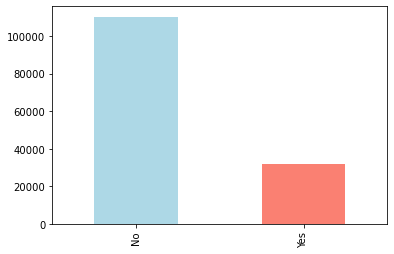

In [6]:
df["RainTomorrow"].value_counts().plot(kind="bar", color=["lightblue", "salmon"]);

In [7]:
# We have a class imbalance in our problem

In [8]:
pd.crosstab(df.Rainfall, df.Location)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Rainfall,,,,,,,,,,,,,,,,,,,,,
0.0,2030,1667,2015,2665,1939,1664,1947,2033,1638,2421,...,2232,2149,1324,2153,1371,1642,1563,1509,1928,2603
0.1,0,8,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
0.2,142,133,199,42,240,280,324,217,134,187,...,105,133,40,100,231,305,126,312,127,91
0.3,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0.4,87,90,70,29,58,112,82,86,107,58,...,69,53,22,66,82,109,56,88,84,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247.2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
268.6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
278.4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


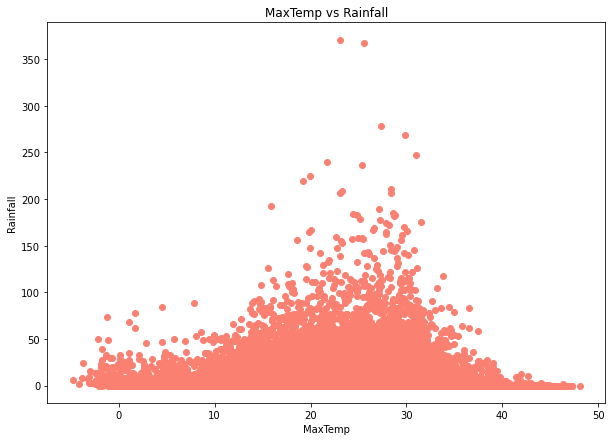

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(df.MaxTemp,
            df.Rainfall,
            color=["salmon"])
plt.title("MaxTemp vs Rainfall")
plt.ylabel("Rainfall")
plt.xlabel("MaxTemp");

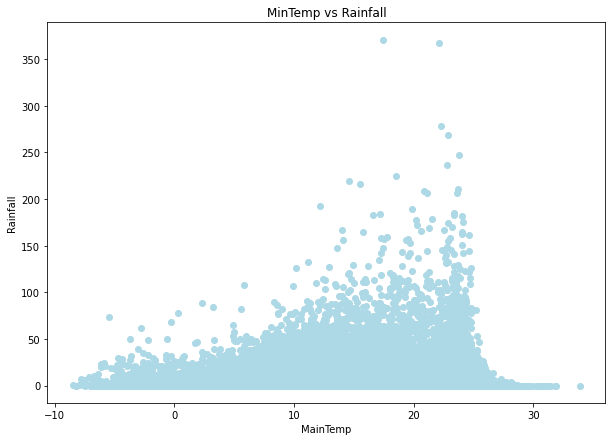

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(df.MinTemp,
            df.Rainfall,
            color=["lightblue"])
plt.title("MinTemp vs Rainfall")
plt.ylabel("Rainfall")
plt.xlabel("MainTemp");

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


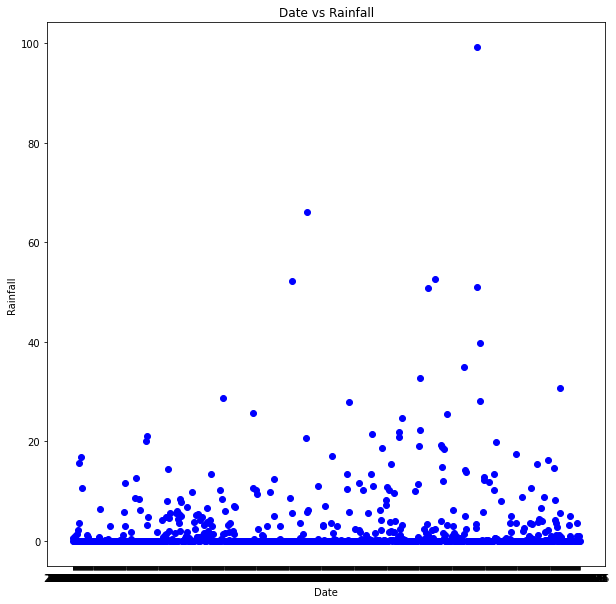

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df.Date[:1000],
           df.Rainfall[:1000],
           color=["blue"])
plt.title("Date vs Rainfall")
plt.ylabel("Rainfall")
plt.xlabel("Date");

### Parsing dates 
when we are working with time series data we want to enrich time and date as much as possible 

we can do that by telling pandas which column has dates in it using the `parse_dates` parameter

In [13]:
# Import the data again but this time parse the dates 
df = pd.read_csv("datasets/weatherAUS.csv",
                 parse_dates=["Date"])

In [14]:
df.Date.dtype

dtype('<M8[ns]')

In [15]:
df.Date[:1000]

0     2008-12-01
1     2008-12-02
2     2008-12-03
3     2008-12-04
4     2008-12-05
         ...    
995   2011-09-22
996   2011-09-23
997   2011-09-24
998   2011-09-25
999   2011-09-26
Name: Date, Length: 1000, dtype: datetime64[ns]

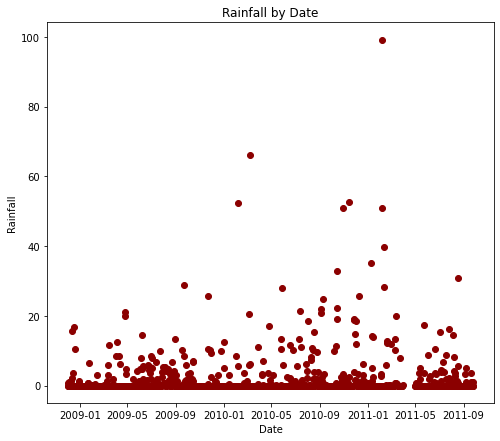

In [16]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(df.Date[:1000],
           df.Rainfall[:1000],
           color=["darkred"])
plt.title("Rainfall by Date")
plt.ylabel("Rainfall")
plt.xlabel("Date");

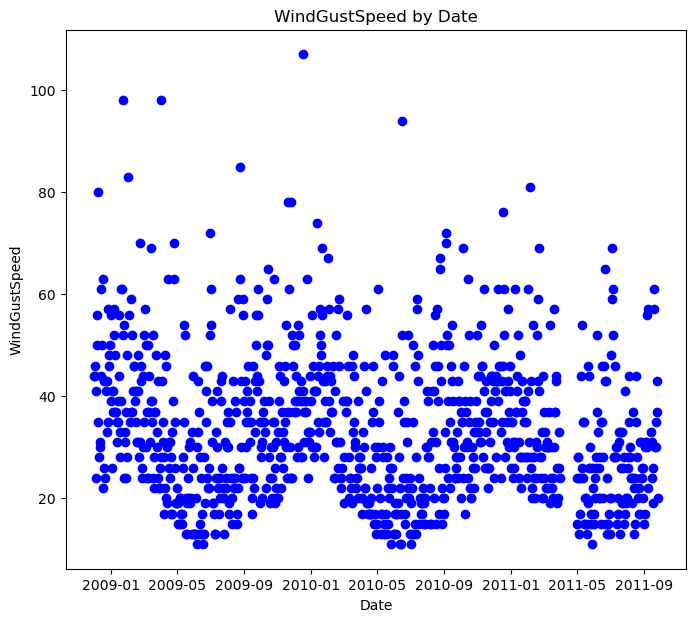

In [17]:
plt.style.use("default")
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(df.Date[:1000],
           df.WindGustSpeed[:1000],
           color=["blue"])
plt.title("WindGustSpeed by Date")
plt.ylabel("WindGustSpeed")
plt.xlabel("Date");

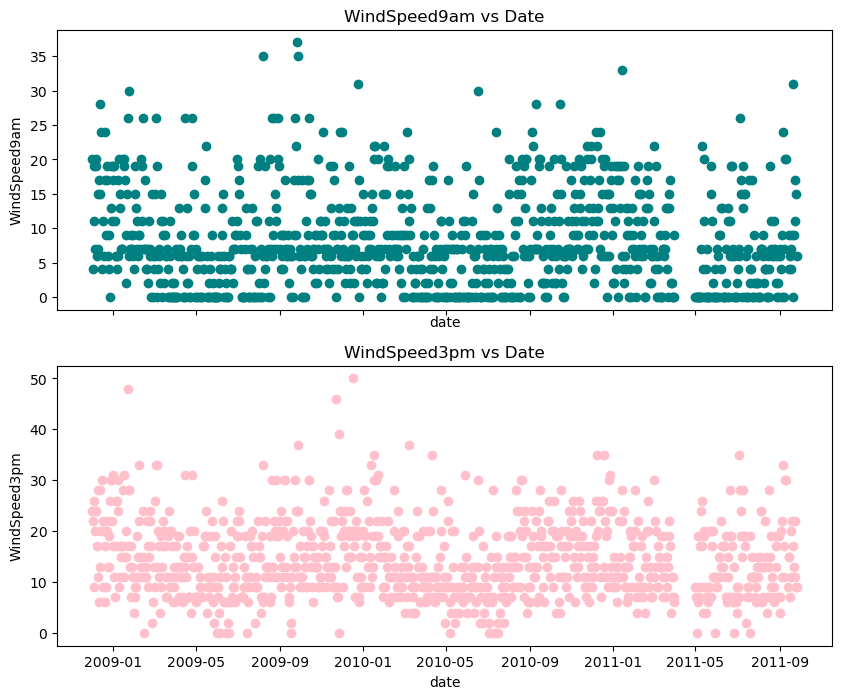

In [18]:
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,8),
                             sharex=True)

# Scatter plot with WindSpeed9am
ax0.scatter(df.Date[:1000],
            df.WindSpeed9am[:1000],
            color="teal");

ax0.set(title="WindSpeed9am vs Date",
        xlabel="date",
        ylabel="WindSpeed9am")

# Scatter plot with WindSpeed3pm
ax1.scatter(df.Date[:1000],
            df.WindSpeed3pm[:1000],
            color="pink")

ax1.set(title="WindSpeed3pm vs Date",
        xlabel="date",
        ylabel="WindSpeed3pm");

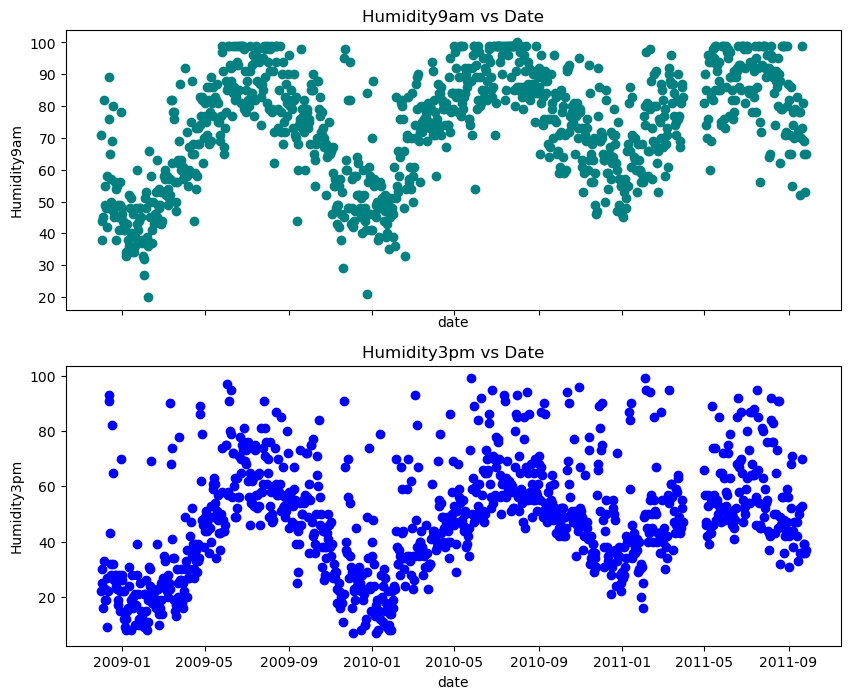

In [19]:
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,8),
                             sharex=True)

# Scatter plot with Humidity9am
ax0.scatter(df.Date[:1000],
            df.Humidity9am[:1000],
            color="teal");

ax0.set(title="Humidity9am vs Date",
        xlabel="date",
        ylabel="Humidity9am")

# Scatter plot with Humidity3pm
ax1.scatter(df.Date[:1000],
            df.Humidity3pm[:1000],
            color="blue")

ax1.set(title="Humidity3pm vs Date",
        xlabel="date",
        ylabel="Humidity3pm");

From this we can infer that Humdity is lowest at January and starts increasing from February till August it is at it's peak on July 
and then from September to December it starts falling

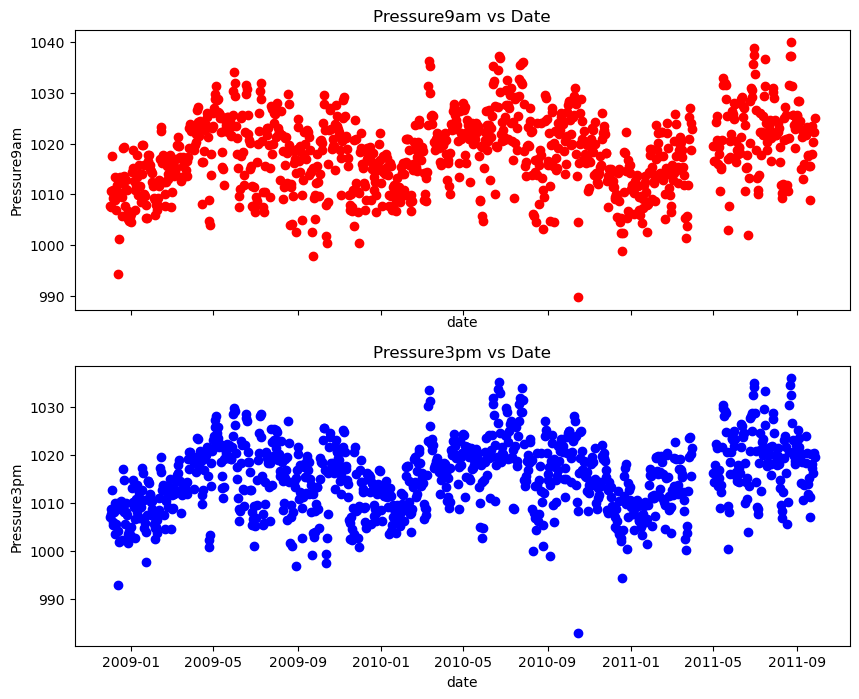

In [20]:
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,8),
                             sharex=True)

# Scatter plot with Pressure9am
ax0.scatter(df.Date[:1000],
            df.Pressure9am[:1000],
            color="red");

ax0.set(title="Pressure9am vs Date",
        xlabel="date",
        ylabel="Pressure9am")

# Scatter plot with Pressure3pm
ax1.scatter(df.Date[:1000],
            df.Pressure3pm[:1000],
            color="blue")

ax1.set(title="Pressure3pm vs Date",
        xlabel="date",
        ylabel="Pressure3pm");

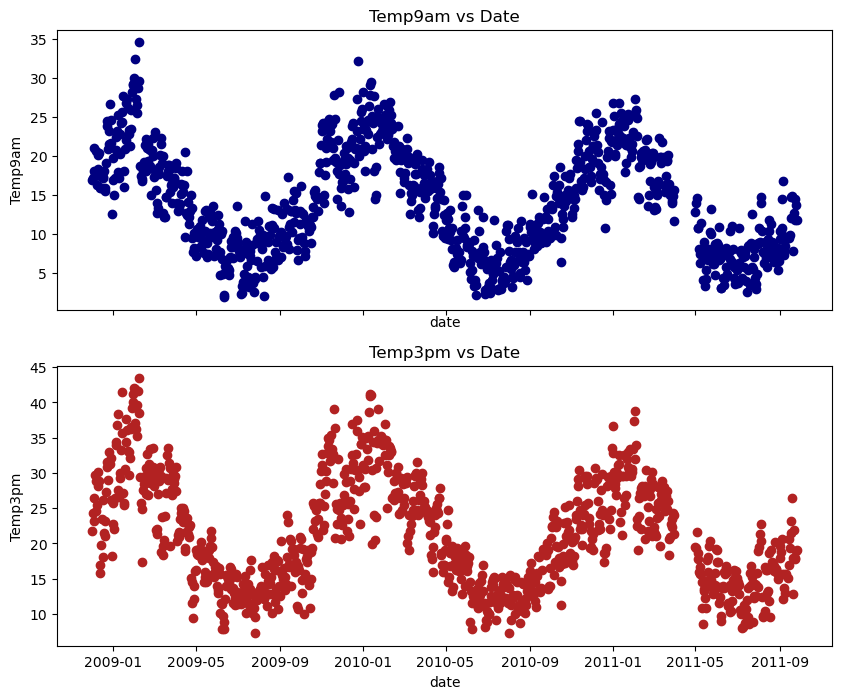

In [21]:
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,8),
                             sharex=True)

# Scatter plot with Temp9am
ax0.scatter(df.Date[:1000],
            df.Temp9am[:1000],
            color="navy");

ax0.set(title="Temp9am vs Date",
        xlabel="date",
        ylabel="Temp9am")

# Scatter plot with Temp3pm
ax1.scatter(df.Date[:1000],
            df.Temp3pm[:1000],
            color="firebrick")

ax1.set(title="Temp3pm vs Date",
        xlabel="date",
        ylabel="Temp3pm");

As Australia lies in the Southern Hemisphere the Summer Season is from December to February and Winter is from June to August so we can see high temps during summer and low during winter 

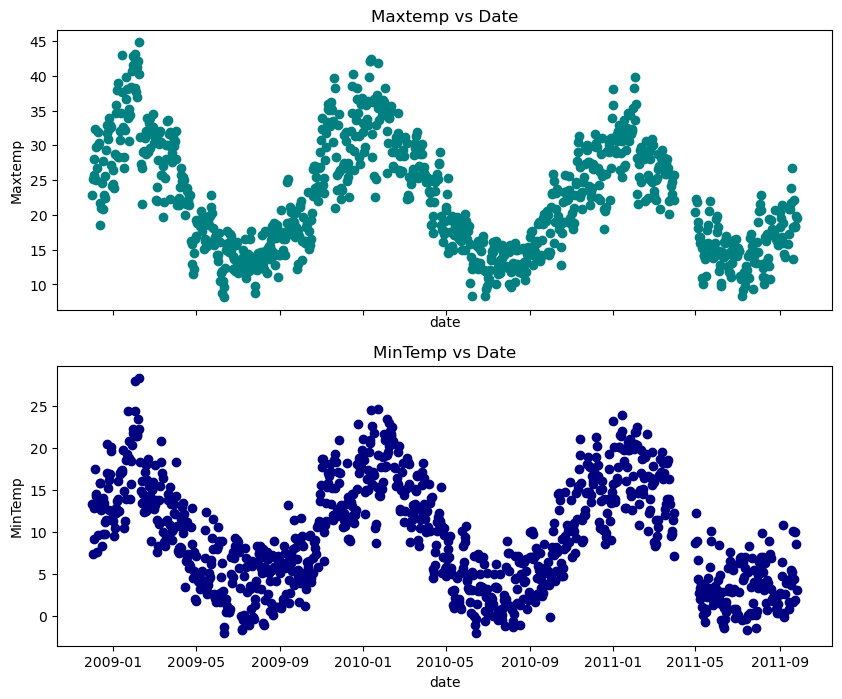

In [22]:
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,8),
                             sharex=True)

# Scatter plot with Maxtemp
ax0.scatter(df.Date[:1000],
            df.MaxTemp[:1000],
            color="teal");

ax0.set(title="Maxtemp vs Date",
        xlabel="date",
        ylabel="Maxtemp")

# Scatter plot with MinTemp
ax1.scatter(df.Date[:1000],
            df.MinTemp[:1000],
            color="navy")

ax1.set(title="MinTemp vs Date",
        xlabel="date",
        ylabel="MinTemp");

from this we can infer that 
During Summer 

* maximum MaxTemp is over 45 degrees
* maximum MinTemp is over 25 degrees
* minimum MaxTemp is between 20-30 degrees
* minimum MinTemp is between 5-15 degrees

During Winter 
* maximum MaxTemp is between 20-25 degrees
* maximum MinTemp is between 5-10 degrees
* minimum MaxTemp is just under 10 degrees
* minimum MinTemp is under 0 degrees



In [23]:
df_tmp = df

In [24]:
df_tmp.head().T

,0,1,2,3,4
Date,2008-12-01 00:00:00,2008-12-02 00:00:00,2008-12-03 00:00:00,2008-12-04 00:00:00,2008-12-05 00:00:00
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [25]:
df_tmp.Date.head(20)

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
5    2008-12-06
6    2008-12-07
7    2008-12-08
8    2008-12-09
9    2008-12-10
10   2008-12-11
11   2008-12-12
12   2008-12-13
13   2008-12-14
14   2008-12-15
15   2008-12-16
16   2008-12-17
17   2008-12-18
18   2008-12-19
19   2008-12-20
Name: Date, dtype: datetime64[ns]

### Sort the DataFrame by the Date 

when working with time series data, it's a good idea to sort it by the date

In [26]:
# Sort the DataFrame in Date order
df_tmp.sort_values(by=["Date"], inplace=True, ascending=True)
df_tmp.Date.head(20)

45587   2007-11-01
45588   2007-11-02
45589   2007-11-03
45590   2007-11-04
45591   2007-11-05
45592   2007-11-06
45593   2007-11-07
45594   2007-11-08
45595   2007-11-09
45596   2007-11-10
45597   2007-11-11
45598   2007-11-12
45599   2007-11-13
45600   2007-11-14
45601   2007-11-15
45602   2007-11-16
45603   2007-11-17
45604   2007-11-18
45605   2007-11-19
45606   2007-11-20
Name: Date, dtype: datetime64[ns]

In [27]:
df_tmp.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [28]:
# make a copy of the original dataset
df_temp = df.copy()

### Adding datetime parameters for the `Date` column

In [29]:
df_temp["Year"] = df_temp.Date.dt.year
df_temp["Month"] = df_temp.Date.dt.month
df_temp["Day"] = df_temp.Date.dt.day
df_temp["DayOfWeek"] = df_temp.Date.dt.dayofweek
df_temp["DayOfYear"] = df_temp.Date.dt.dayofyear

In [30]:
df_temp.head().T

,45587,45588,45589,45590,45591
Date,2007-11-01 00:00:00,2007-11-02 00:00:00,2007-11-03 00:00:00,2007-11-04 00:00:00,2007-11-05 00:00:00
Location,Canberra,Canberra,Canberra,Canberra,Canberra
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,NW,ENE,NW,NW,SSE
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,SW,E,N,WNW,SSE


In [31]:
# Since we've enriched our DataFrame with datetime features we can now remove the Date column
df_temp.drop("Date", axis=1,inplace=True)

In [32]:
df_temp.Location.value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Perth               3193
Brisbane            3193
Hobart              3193
Melbourne           3193
Darwin              3193
Wollongong          3040
Bendigo             3040
AliceSprings        3040
GoldCoast           3040
MountGambier        3040
Albury              3040
Ballarat            3040
Albany              3040
MountGinini         3040
Launceston          3040
Townsville          3040
Cairns              3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
Witchcliffe         3009
PearceRAAF          3009
Cobar               3009
Nuriootpa           3009
Williamtown         3009
NorfolkIsland       3009
Sale                3009
BadgerysCreek       3009
SydneyAirport       3009
MelbourneAirport    3009
CoffsHarbour        3009
PerthAirport        3009
WaggaWagga          3009
Woomera             3009
Portland            3009
Dartmoor            3009
Watsonia            3009


In [33]:
df_temp.tail().T

,64190,67199,70392,123830,145459
Location,Sale,MelbourneAirport,Melbourne,Perth,Uluru
MinTemp,0.1,5.5,8.6,6.3,14.9
MaxTemp,14.8,13.9,14.3,17.0,NaN
Rainfall,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,2.8,2.8,1.6,NaN
Sunshine,NaN,3.8,3.8,7.9,NaN
WindGustDir,NaN,NNW,NW,E,NaN
WindGustSpeed,NaN,44.0,35.0,26.0,NaN
WindDir9am,WNW,N,N,SE,ESE
WindDir3pm,NW,NW,NNW,SE,ESE


In [34]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 45587 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-

## Data Preprocessing

### Converting string to categories
one way we can turn all of our data into numbers is by converting them into pandas categories

In [35]:
pd.api.types.is_string_dtype(df_temp.Location)

True

In [36]:
# Find the columns which contains strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [37]:
# This will turn all the string values into categorical values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [38]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 45587 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Location       145460 non-null  category
 1   MinTemp        143975 non-null  float64 
 2   MaxTemp        144199 non-null  float64 
 3   Rainfall       142199 non-null  float64 
 4   Evaporation    82670 non-null   float64 
 5   Sunshine       75625 non-null   float64 
 6   WindGustDir    135134 non-null  category
 7   WindGustSpeed  135197 non-null  float64 
 8   WindDir9am     134894 non-null  category
 9   WindDir3pm     141232 non-null  category
 10  WindSpeed9am   143693 non-null  float64 
 11  WindSpeed3pm   142398 non-null  float64 
 12  Humidity9am    142806 non-null  float64 
 13  Humidity3pm    140953 non-null  float64 
 14  Pressure9am    130395 non-null  float64 
 15  Pressure3pm    130432 non-null  float64 
 16  Cloud9am       89572 non-null   float64 
 17  Cloud3

In [39]:
df_temp.RainTomorrow.cat.categories

Index(['No', 'Yes'], dtype='object')

In [40]:
df_temp.Location.cat.codes

45587      9
45588      9
45589      9
45590      9
45591      9
          ..
64190     35
67199     19
70392     18
123830    31
145459    41
Length: 145460, dtype: int8

Thanks to Pandas Categories we now have a way to access all our data in form of numbers
But we still have to fill the missing data...

In [41]:
df_temp.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
DayOfWeek            0
DayOfYear            0
dtype: int64

In [42]:
### Saving preprocessed data
# df_temp.to_csv("datasets/temp.csv",
#                index=False)

In [43]:
df_temp.RainTomorrow.cat.codes

45587     1
45588     1
45589     1
45590     1
45591     0
         ..
64190     0
67199     0
70392     1
123830    0
145459   -1
Length: 145460, dtype: int8

## Filling missing values 
### Filling numeric missing values first


In [44]:
# Check for numerical values 
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Year
Month
Day
DayOfWeek
DayOfYear


In [45]:
df_temp.Pressure9am

45587     1019.7
45588     1012.4
45589     1009.5
45590     1005.5
45591     1018.3
           ...  
64190     1016.3
67199     1017.8
70392     1017.4
123830    1028.6
145459    1020.2
Name: Pressure9am, Length: 145460, dtype: float64

In [46]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [47]:
# Filling numeric rows with the mean
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with the mean
            df_temp[label] = content.fillna(content.mean())

In [48]:
# Check for missing values now if any
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

There are no missing values since we have filled the missing values with the median of the data

In [49]:
df_temp.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
DayOfWeek            0
DayOfYear            0
dtype: int64

In [50]:
df_temp.head().T

,45587,45588,45589,45590,45591
Location,Canberra,Canberra,Canberra,Canberra,Canberra
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,NW,ENE,NW,NW,SSE
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,SW,E,N,WNW,SSE
WindDir3pm,NW,W,NNE,W,ESE


In [51]:
# Check to see how many examples were missing in MinTemp
#df_temp.MinTemp_is_missing.value_counts()

In [52]:
df_temp.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
DayOfWeek            0
DayOfYear            0
dtype: int64

### Filling and turning categorical features into numbers

In [53]:
# Check for columns which arent numeric
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [54]:
pd.Categorical(df_temp.RainTomorrow).codes

array([ 1,  1,  1, ...,  1,  0, -1], dtype=int8)

In [55]:
df_temp.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [56]:
# Filling categorical rows with the mode
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Turn Categories into numbers
            df_temp[label] = pd.Categorical(content).codes
            # Fill missing categorical values with the mode
            df_temp[label] = content.fillna(content.mode()[0])

In [57]:
df_temp["Location"] = df_temp["Location"].cat.codes
df_temp["WindGustDir"] = df_temp["WindGustDir"].cat.codes
df_temp["WindDir9am"] = df_temp["WindDir9am"].cat.codes
df_temp["WindDir3pm"] = df_temp["WindDir3pm"].cat.codes
df_temp["RainToday"] = df_temp["RainToday"].cat.codes
df_temp["RainTomorrow"] = df_temp["RainTomorrow"].cat.codes

In [58]:
df_temp.head().T

,45587,45588,45589,45590,45591
Location,9.0,9.0,9.0,9.0,9.0
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,7.0,1.0,7.0,7.0,10.0
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,12.0,0.0,3.0,14.0,10.0
WindDir3pm,7.0,13.0,5.0,13.0,2.0


In [59]:
df_temp.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
DayOfWeek        0
DayOfYear        0
dtype: int64

In [60]:
df_temp.RainTomorrow.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

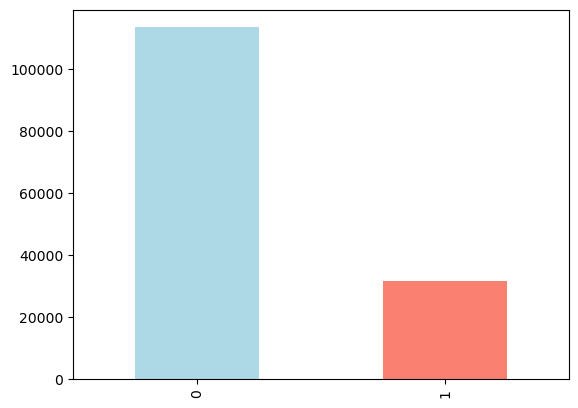

In [61]:
df_temp.RainTomorrow.value_counts().plot(kind="bar", 
                                         color=["lightblue", "salmon"]);
                       

In [62]:
# Splitting the data
X = df_temp.drop(["RainTomorrow"], axis=1)
y = df_temp["RainTomorrow"]

# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 45587 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int8   
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int8   
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int8   
 9   WindDir3pm     145460 non-null  int8   
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non

## Machine learning modelling

Here we're done with the data preprocessing and now we will proceed to building and fitting the machine learning models

we are going to experiment with 3 different models on our dataset and see which one performs the best 
we will use the baseline models in the begining 


In [64]:
# We actually don't need these columns
df_temp = df_temp.drop(["DayOfWeek","DayOfYear"], axis=1)

In [65]:
df_temp.Location.dtype

dtype('int8')

In [66]:
# %%time
# # Instantiate the model
# clf1 = LogisticRegression(n_jobs=-1,
#                           random_state=12)
# # fit the model
# clf1.fit(X_train, y_train)

In [67]:
#clf1.score(X_test, y_test)

### First we will try the RandomForestClassifier

This model is without dropping the highly correlated columns from our dataset

In [68]:
%%time
# Instantiate the 2nd model
clf2 = RandomForestClassifier(n_jobs=-1,
                              random_state=12)

# fit the model
clf2.fit(X_train, y_train)

Wall time: 5.6 s


RandomForestClassifier(n_jobs=-1, random_state=12)

In [69]:
clf2.score(X_test, y_test)

0.8580709473394748

In [70]:
# make a confusion matrix for randomForest Classifier
y_preds = clf2.predict(X_test)

In [71]:
print(confusion_matrix(y_test, y_preds))

[[21723  1012]
 [ 3117  3240]]


In [72]:
# Print the classification report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22735
           1       0.76      0.51      0.61      6357

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092



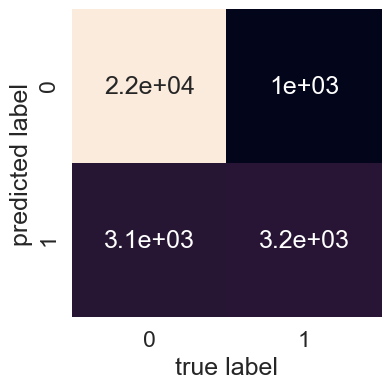

In [73]:
# Visualize the confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig,ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

As we can see that our model is having troubles predicting the true negative values (yes rainfall) because of a class imbalance 
as we have more number of no rainfall samples in our dataset



<function matplotlib.pyplot.show(close=None, block=None)>

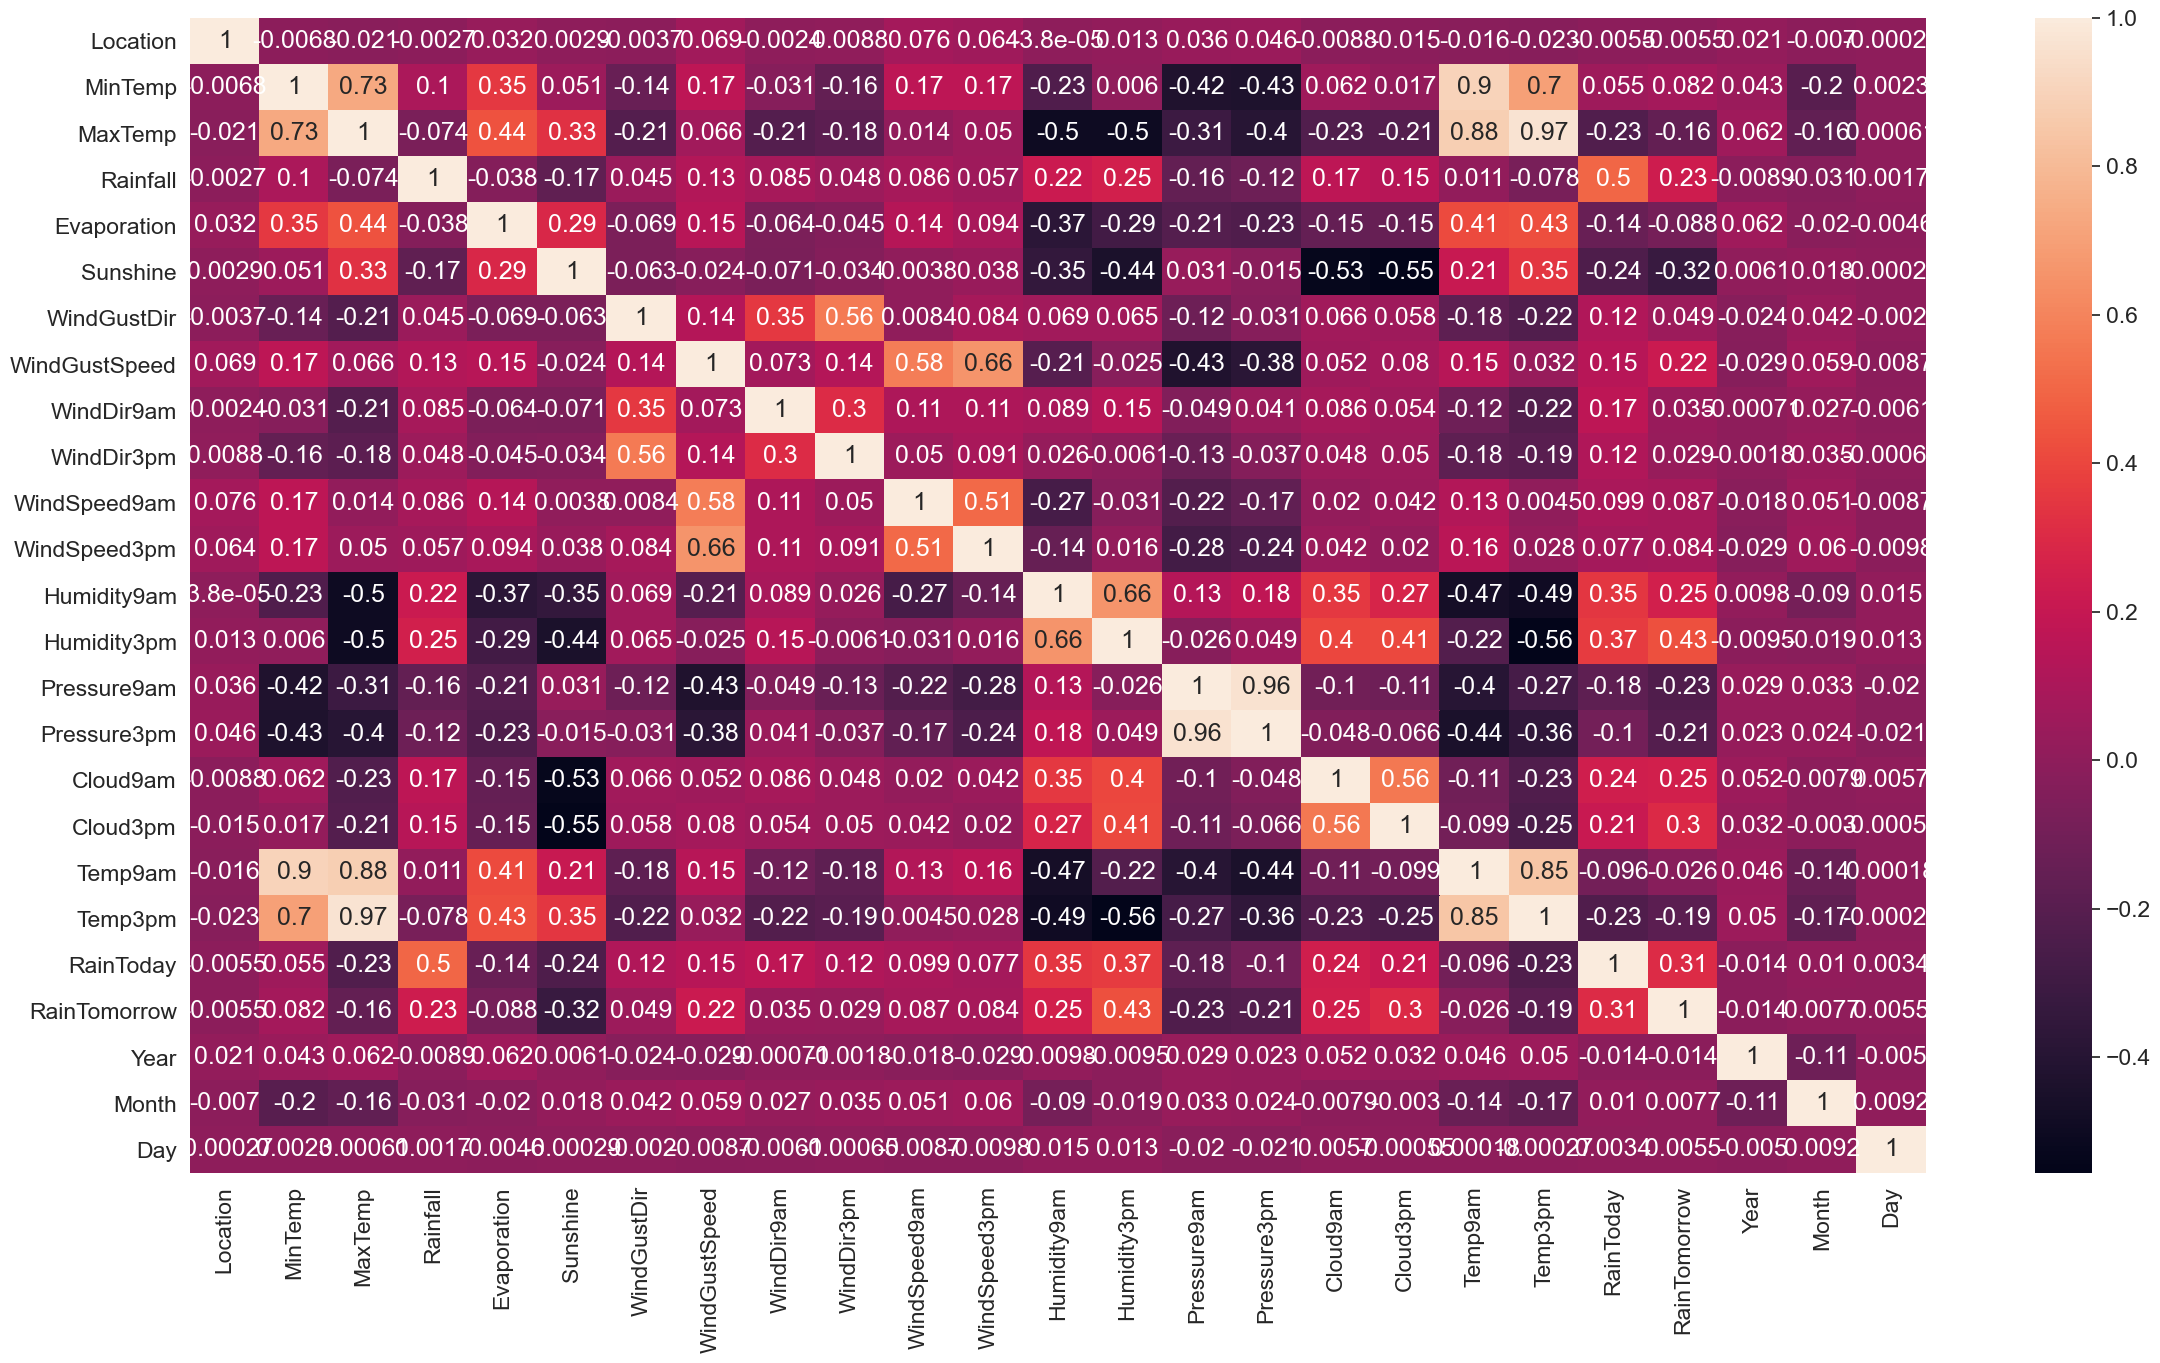

In [74]:
# plotting a correlation matrix 
plt.figure(figsize=(28,15))
sns.heatmap(df_temp.corr(),
            annot=True)
plt.xticks(rotation=90)
plt.show

From the correlation matrix we can infer that 

* Temp9am and MaxTemp are highly correlated
* Temp9am and MinTemp are highly correlated
* Temp3pm and MaxTemp are highly correlated 
* Temp3pm and MinTemp are highly correlated
* Pressure9am and Pressure3pm are highly correlated
* MinTemp and MaxTemp are highly correlated

In [75]:
# Let's drop the highly correlated columns
df_temp = df_temp.drop(["Temp9am", "Temp3pm", "Pressure3pm","MaxTemp"], axis=1)
df_temp.columns

Index(['Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

In [76]:
# df_temp = df_temp.drop(["Humidity9am"], axis=1)
# df_temp.columns

In [77]:
df_temp.head().T

,45587,45588,45589,45590,45591
Location,9.0,9.0,9.0,9.0,9.0
MinTemp,8.0,14.0,13.7,13.3,7.6
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,7.0,1.0,7.0,7.0,10.0
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,12.0,0.0,3.0,14.0,10.0
WindDir3pm,7.0,13.0,5.0,13.0,2.0
WindSpeed9am,6.0,4.0,6.0,30.0,20.0


In [78]:
# Split the data into X and y
X = df_temp.drop(["RainTomorrow"], axis=1)
y = df_temp["RainTomorrow"]


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [79]:
%%time
# Let's fit our model again
# Instantiate the 2nd model
clf2 = RandomForestClassifier(n_jobs=-1,
                              random_state=12)

# fit the model
clf2.fit(X_train, y_train)

Wall time: 4.2 s


RandomForestClassifier(n_jobs=-1, random_state=12)

In [80]:
clf2.score(X_test, y_test)

0.8578647050735597

In [81]:
y_preds = clf2.predict(X_test)

In [82]:
print(confusion_matrix(y_test, y_preds))

[[21763   981]
 [ 3154  3194]]


In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22744
           1       0.77      0.50      0.61      6348

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092



### Let's try the LogisticRegression model


In [84]:
%%time
# Instantiate the model
clf1 = LogisticRegression(n_jobs=-1,
                          random_state=12)

# Fit the model
clf1.fit(X_train, y_train)

Wall time: 6.5 s


LogisticRegression(n_jobs=-1, random_state=12)

In [85]:
# score the model
clf1.score(X_test, y_test)

0.8416059397772584

In [86]:
# make a confusion matrix and classification report
y_preds = clf1.predict(X_test)
print(confusion_matrix(y_test, y_preds))

[[21568  1176]
 [ 3432  2916]]


In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22744
           1       0.71      0.46      0.56      6348

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



So After training and Evaluating 2 models we can see that RandomForestClassifier is giving us better results than LogisticRegression
hence next we are going to tune our RandomForestClassifier to improve it 

## Improving the model(Hyperparameter tuning)

#### We're going to tune the RandomForestClassifer with RandomizedSearchCV

In [104]:
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100,200,1000),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(3,5,10),
           "min_samples_leaf": np.arange(2,5,10)}

In [105]:
#Setup hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=10,
                           n_iter=20,
                           n_jobs=-1,
                           random_state=42,
                           verbose=True)

#Fit hyperparameter search model for the randomforestclassfier
rs_rf.fit(X_train, y_train)

C:\Users\Aditya\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 4 candidates, totalling 40 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([2]),
                                        'min_samples_split': array([3]),
                                        'n_estimators': array([100])},
                   random_state=42, verbose=True)

In [106]:
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': None}

In [107]:
rs_rf.score(X_test,y_test)

0.858242815894404